In [133]:
import pandas as pd
df = pd.read_csv('Skyserver_SQL7_1_2025 6_34_40 AM.csv', header=1)
print(df.head())

                 objid         ra        dec    photoz  photozerr     specz  \
0  1237671768542478711  257.82458  64.133257  0.079193   0.022867  0.082447   
1  1237671768542478711  257.82458  64.133257  0.079193   0.022867  0.082466   
2  1237671768542478713  257.83332  64.126043  0.091507   0.014511  0.081218   
3  1237671768542544090  257.85137  64.173247  0.081102   0.009898  0.079561   
4  1237671768542544090  257.85137  64.173247  0.081102   0.009898  0.079568   

   speczerr  proj_sep      umag   umagerr      gmag   gmagerr      rmag  \
0  0.000017  8.347733  18.96488  0.043377  17.49815  0.005672  16.75003   
1  0.000014  8.347733  18.96488  0.043377  17.49815  0.005672  16.75003   
2  0.000021  8.011259  20.22848  0.072019  18.38334  0.007763  17.46793   
3  0.000022  8.739276  19.21829  0.050135  17.18970  0.004936  16.22043   
4  0.000019  8.739276  19.21829  0.050135  17.18970  0.004936  16.22043   

    rmagerr  obj_type  
0  0.004708         3  
1  0.004708         3  
2 

the csv file of the file is read and viewed

In [130]:

print(df.columns.values)
number_of_contents= len(df.columns)
print(number_of_contents)

['#Table1']
1


In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.constants import G, c
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

# Constants:

H_0 = None # Hubble constant in SI
c =  c  # Speed of light in m/s
G =  G # Gravitational constant in pc kg^-1 (m/s)^2
q0= -0.534  # Deceleration parameter (assumed from Planck fit KEEP it as it is)
averaged_df = df.groupby('objid').agg({'specz': 'mean','ra': 'first','dec': 'first','proj_sep': 'first',}).reset_index()
averaged_df.describe()['specz']

,specz
count,92.000000
mean,0.080838
std,0.008578
min,0.069976
25%,0.077224
50%,0.080961
75%,0.082797
max,0.150886


importing the constants required for astronomical calculations and aggregating the data in the file

In [136]:
#finding the Mean and Standard Deviation
mean_redshift = averaged_df['specz'].mean()
std_redshift = averaged_df['specz'].std()

print(f"Mean Redshift: {mean_redshift}")
print(f"Standard Deviation of Redshift: {std_redshift}")

#finding the maximum and minimum limits
min_redshift = averaged_df['specz'].min()
max_redshift = averaged_df['specz'].max()

print(f"Minimum Redshift: {min_redshift}")
print(f"Maximum Redshift: {max_redshift}")

Mean Redshift: 0.08083762565217394
Standard Deviation of Redshift: 0.008577613916301633
Minimum Redshift: 0.069976125
Maximum Redshift: 0.1508861


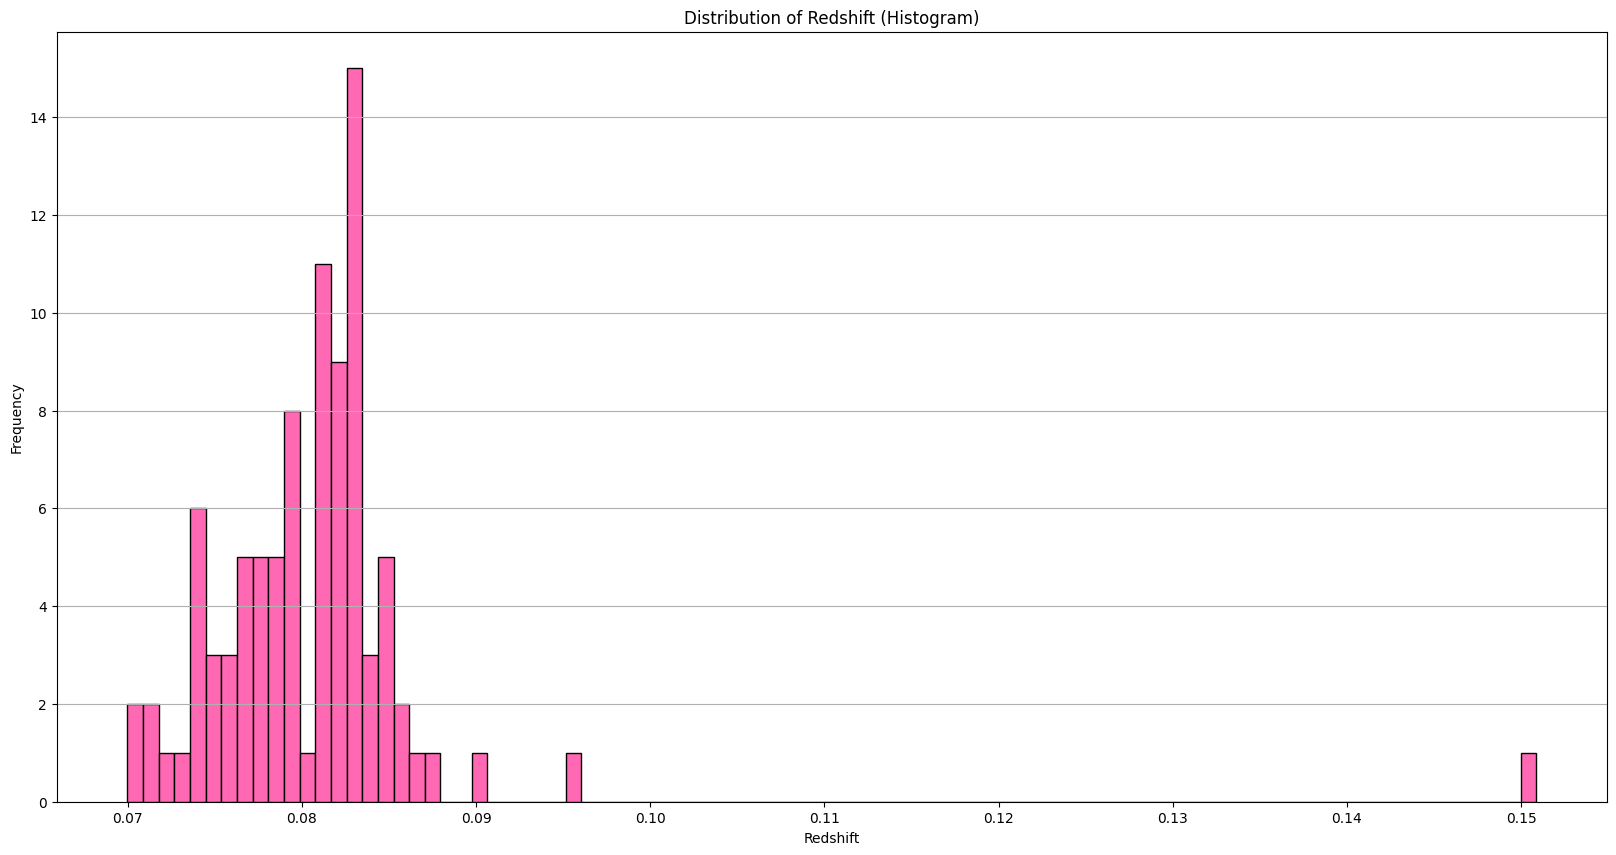

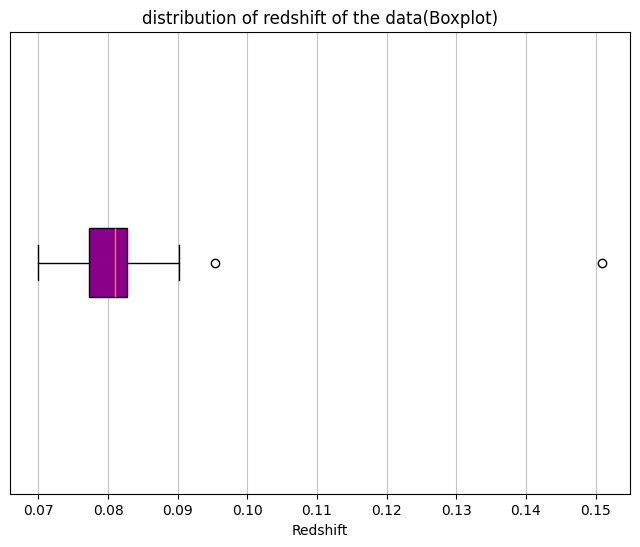

In [132]:
# Histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.hist(averaged_df['specz'], bins=90, color='hotpink', edgecolor='black')
plt.title('Distribution of Redshift (Histogram)')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=1)
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(averaged_df['specz'], vert=False, patch_artist=True, boxprops=dict(facecolor='darkmagenta'))
plt.title('distribution of redshift of the data(Boxplot)')
plt.xlabel('Redshift')
plt.yticks([])
plt.grid(axis='x', alpha=0.75)
plt.show()


In [114]:
# Filtering the data based on specz values, used 3 sigma deviation from mean as upper limit.

import matplotlib.pyplot as plt
filtered_df = averaged_df[(averaged_df['specz'] > mean_redshift - 3 * std_redshift) & (averaged_df['specz'] < mean_redshift + 3 * std_redshift)].reset_index(drop=True)

print("Filtered DataFrame based on 3-sigma limit of redshift:")
print(filtered_df)

print("Description of redshift in the filtered data:")
print(filtered_df.describe()['specz'])



Filtered DataFrame based on 3-sigma limit of redshift:
                  objid     specz         ra        dec  proj_sep
0   1237671768542478711  0.082457  257.82458  64.133257  8.347733
1   1237671768542478713  0.081218  257.83332  64.126043  8.011259
2   1237671768542544090  0.079564  257.85137  64.173247  8.739276
3   1237671768542544107  0.080842  257.89303  64.141138  6.839642
4   1237671768542544127  0.084575  257.91585  64.107290  5.666108
..                  ...       ...        ...        ...       ...
86  1237671939804627462  0.082060  258.45078  64.020363  9.483937
87  1237671939804627464  0.071804  258.44994  64.025909  9.316140
88  1237671939804627483  0.080790  258.43205  64.123685  8.146154
89  1237671939804627518  0.082876  258.46676  64.119499  8.986029
90  1237671939804627535  0.080897  258.48871  64.111343  9.483374

[91 rows x 5 columns]
Description of redshift in the filtered data:
count    91.000000
mean      0.080068
std       0.004390
min       0.069976
25%     

DataFrame with new 'velocity' column:
                  objid     specz         ra        dec  proj_sep  \
0   1237671768542478711  0.082457  257.82458  64.133257  8.347733   
1   1237671768542478713  0.081218  257.83332  64.126043  8.011259   
2   1237671768542544090  0.079564  257.85137  64.173247  8.739276   
3   1237671768542544107  0.080842  257.89303  64.141138  6.839642   
4   1237671768542544127  0.084575  257.91585  64.107290  5.666108   
..                  ...       ...        ...        ...       ...   
86  1237671939804627462  0.082060  258.45078  64.020363  9.483937   
87  1237671939804627464  0.071804  258.44994  64.025909  9.316140   
88  1237671939804627483  0.080790  258.43205  64.123685  8.146154   
89  1237671939804627518  0.082876  258.46676  64.119499  8.986029   
90  1237671939804627535  0.080897  258.48871  64.111343  9.483374   

        velocity  
0   24719.932747  
1   24348.666769  
2   23852.805546  
3   24235.764929  
4   25355.070050  
..           ...  


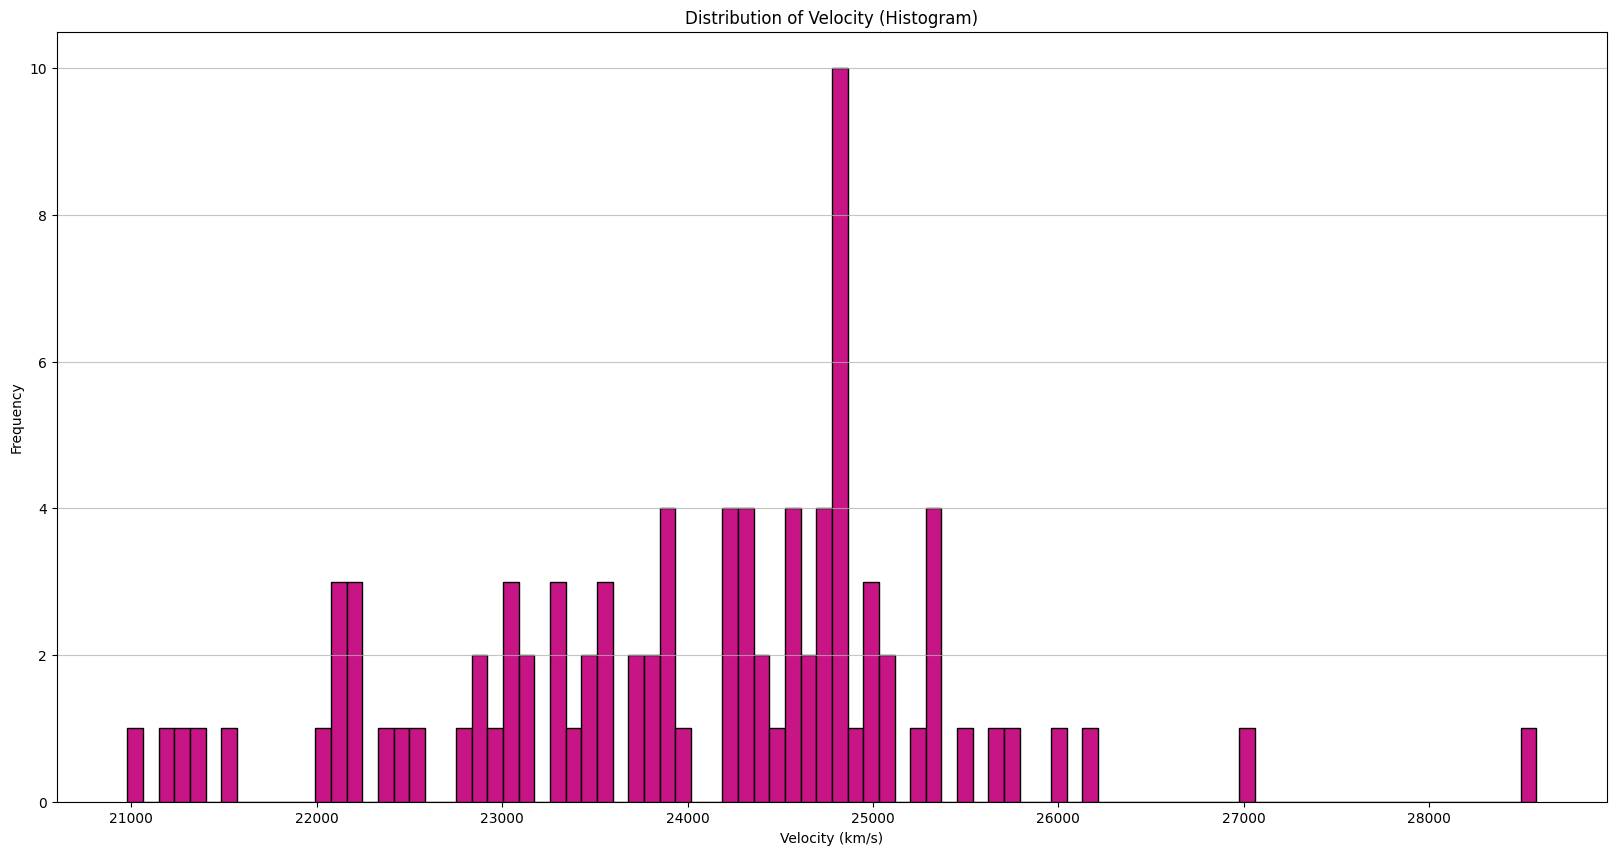

In [115]:
# velocity: v = c * z
import matplotlib.pyplot as plt
filtered_df['velocity'] = c.to(u.km/u.s).value * filtered_df['specz']
print("DataFrame with new 'velocity' column:")
print(filtered_df)
#to plot the velocity histogram
plt.figure(figsize=(20, 10))
plt.hist(filtered_df['velocity'], bins=90, color='mediumvioletred', edgecolor='black')
plt.title('Distribution of Velocity (Histogram)')
plt.xlabel('Velocity (km/s)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [116]:
cluster_redshift = filtered_df['specz'].mean()
print(cluster_redshift)

0.08006786219780221


In [117]:
import matplotlib.pyplot as plt
#Doppler formula for velocity dispersion:
# v = c * ( (1+z)^2 - (1+z_cluster)^2 ) / ( (1+z)^2 + (1+z_cluster)^2 )
#where z=redshift of each galaxy, z_cluster= mean redshift of the cluster

def relativistic_velocity(z, z_cluster):
  num = (1 + z)**2 - (1 + z_cluster)**2
  den = (1 + z)**2 + (1 + z_cluster)**2
  return c.to(u.km/u.s).value * (num / den)
filtered_df['relativistic_velocity'] = relativistic_velocity(filtered_df['specz'], cluster_redshift)
velocity_dispersion = filtered_df['relativistic_velocity'].std() * (u.km/u.s)
print(f"\nVelocity dispersion of galaxies relative to the cluster mean redshift: {velocity_dispersion:.2f}")
print(f"The value of the cluster redshift = {cluster_redshift:.4}")
print(f"The characteristic value of velocity dispersion of the cluster along the line of sight = {velocity_dispersion:.4}.")


Velocity dispersion of galaxies relative to the cluster mean redshift: 1218.49 km / s
The value of the cluster redshift = 0.08007
The characteristic value of velocity dispersion of the cluster along the line of sight = 1.218e+03 km / s.


In [ ]:
#individual galaxy redshift and mean cluster redshift
print("\nIndividual Galaxy Redshift and Mean Cluster Redshift:")
for index, row in filtered_df.iterrows():
  individual_redshift = row['specz']
  print(f"Galaxy (objid: {row['objid']}) Redshift: {individual_redshift:.4f}, Mean Cluster Redshift: {cluster_redshift:.4f}")


Individual Galaxy Redshift and Mean Cluster Redshift:
Galaxy (objid: 1.2376717685424786e+18) Redshift: 0.0825, Mean Cluster Redshift: 0.0801
Galaxy (objid: 1.2376717685424786e+18) Redshift: 0.0812, Mean Cluster Redshift: 0.0801
Galaxy (objid: 1.2376717685425441e+18) Redshift: 0.0796, Mean Cluster Redshift: 0.0801
Galaxy (objid: 1.2376717685425441e+18) Redshift: 0.0808, Mean Cluster Redshift: 0.0801
Galaxy (objid: 1.2376717685425441e+18) Redshift: 0.0846, Mean Cluster Redshift: 0.0801
Galaxy (objid: 1.2376717685425441e+18) Redshift: 0.0768, Mean Cluster Redshift: 0.0801
Galaxy (objid: 1.2376717685425441e+18) Redshift: 0.0833, Mean Cluster Redshift: 0.0801
Galaxy (objid: 1.2376717685425441e+18) Redshift: 0.0828, Mean Cluster Redshift: 0.0801
Galaxy (objid: 1.2376717685425441e+18) Redshift: 0.0821, Mean Cluster Redshift: 0.0801
Galaxy (objid: 1.2376717685425441e+18) Redshift: 0.0773, Mean Cluster Redshift: 0.0801
Galaxy (objid: 1.2376717685425441e+18) Redshift: 0.0829, Mean Cluster Redsh

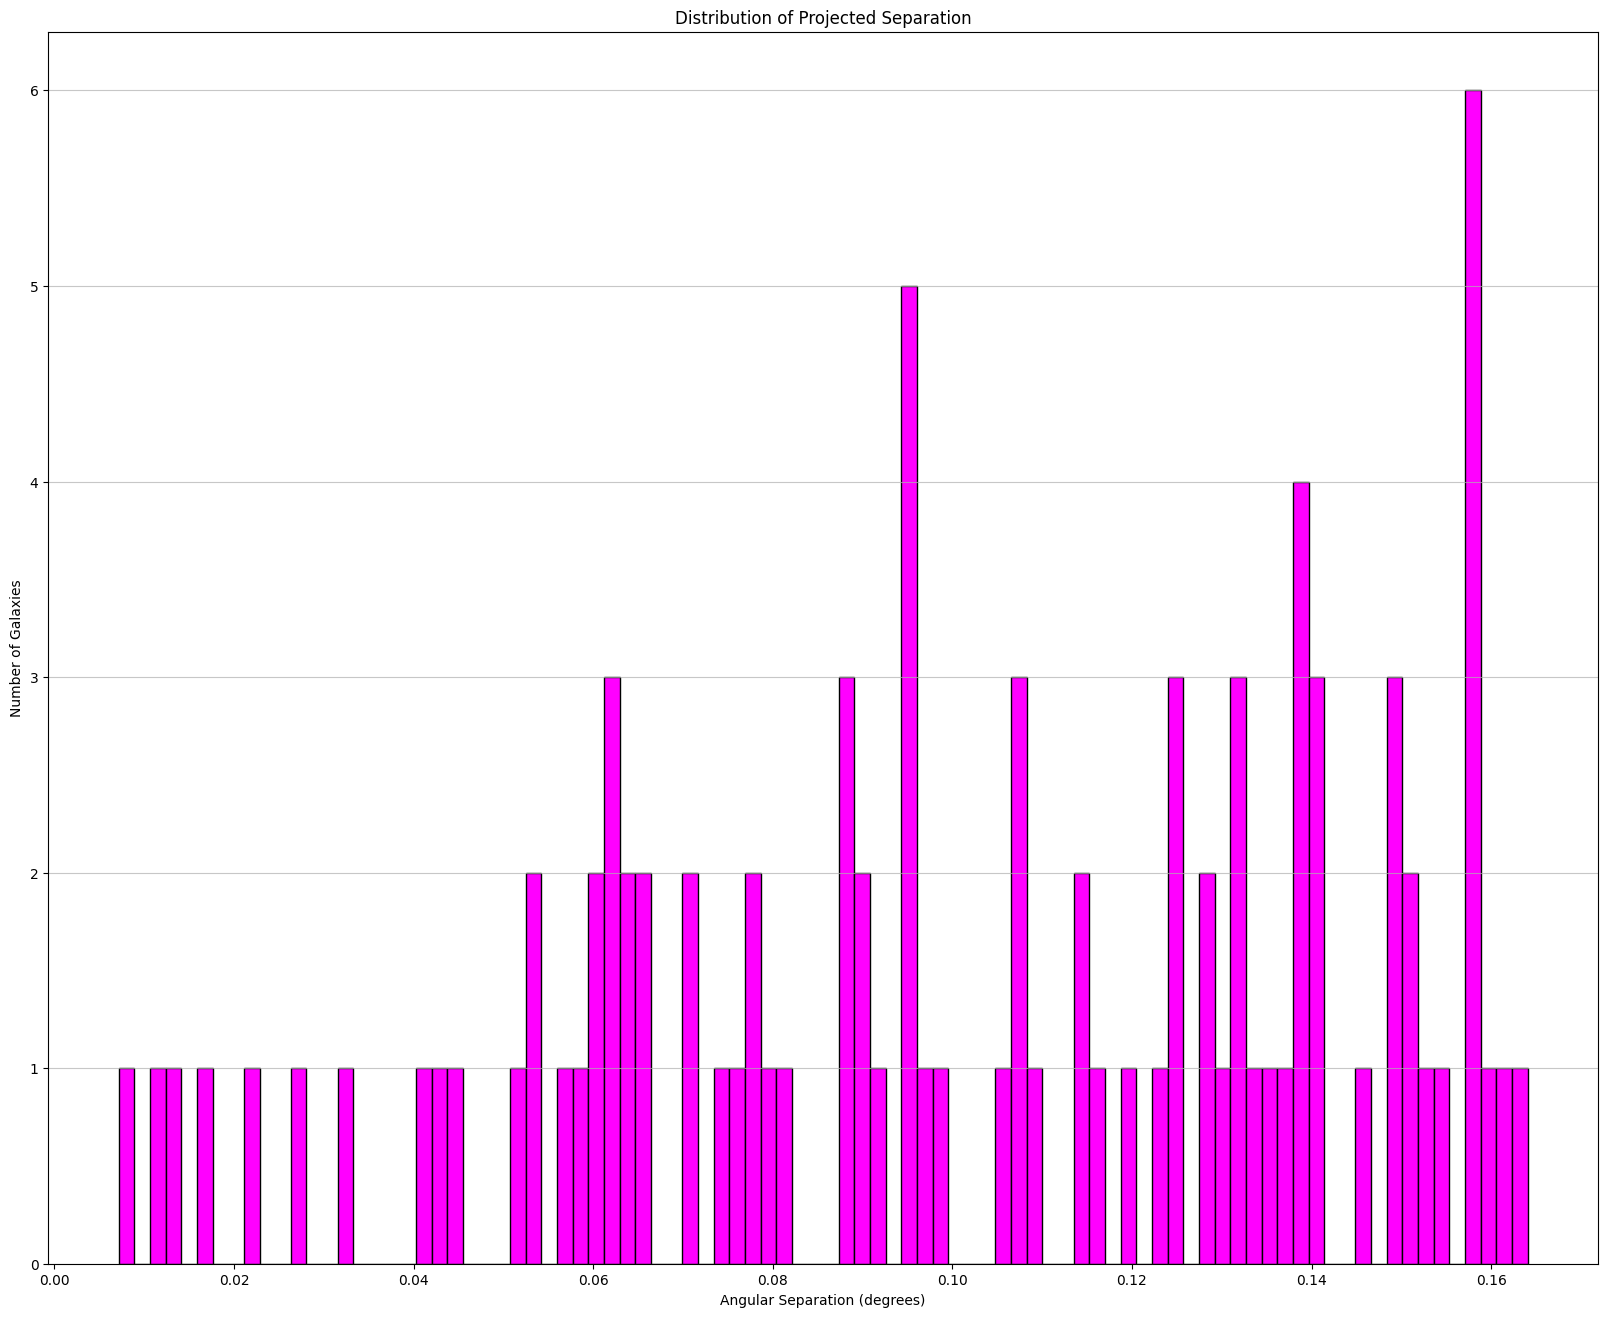

In [118]:
#Plot histogram for proj sep column

import matplotlib.pyplot as plt
filtered_df['proj_sep_deg'] = filtered_df['proj_sep'] / 60.0
plt.figure(figsize=(20, 16))
plt.hist(filtered_df['proj_sep_deg'], bins=90, color='fuchsia', edgecolor='black')
plt.title('Distribution of Projected Separation')
plt.xlabel('Angular Separation (degrees)')
plt.ylabel('Number of Galaxies')
plt.grid(axis='y', alpha=0.7)
plt.show()

In [121]:
print(f"Deceleration parameter (q0): {q0}")
x = 1 + q0
print(f"1 + q0: {x}")

def co_moving_distance(z, q0_val):
    """Calculates the comoving distance."""
    H_0 = cosmo.H0.value
    c_kms = c.to(u.km/u.s).value
    mum = (c_kms * z) / H_0
    men = 1 - (z / 2) * (x)
    return mum * men


filtered_df['comoving_distance_Mpc'] = co_moving_distance(filtered_df['specz'], q0)

print("\nDataFrame with new 'comoving_distance_Mpc' column:")
print(filtered_df[['objid', 'specz', 'comoving_distance_Mpc']].head())
r = filtered_df['comoving_distance_Mpc'].mean()

print(f"\nAverage Comoving Distance: {r:.2f} Mpc")


Deceleration parameter (q0): -0.534
1 + q0: 0.46599999999999997

DataFrame with new 'comoving_distance_Mpc' column:
                 objid     specz  comoving_distance_Mpc
0  1237671768542478711  0.082457             358.335834
1  1237671768542478713  0.081218             353.057867
2  1237671768542544090  0.079564             346.003698
3  1237671768542544107  0.080842             351.452211
4  1237671768542544127  0.084575             367.357689

Average Comoving Distance: 348.13 Mpc


In [122]:
#Estimating the characteristic size of the cluster in Mpc

import numpy as np
filtered_df['proj_sep_rad'] = np.deg2rad(filtered_df['proj_sep_deg'])
std_proj_sep_rad = filtered_df['proj_sep_rad'].std()
characteristic_size_ = r * std_proj_sep_rad
print(f"\nEstimated Characteristic Size of the Cluster: {characteristic_size_:.2f} Mpc")


Estimated Characteristic Size of the Cluster: 0.26 Mpc


In [120]:
Da = r / (1+cluster_redshift)
print(f"The diameter is: {Da:.2f} Mpc")

#calculating the dynamical mass of the cluster
sigma_ms = velocity_dispersion.to(u.m/u.s).value
print(f"Velocity dispersion (in m/s): {sigma_ms:.2f}")
Da_m_value = (Da * u.Mpc).to(u.m).value

# Get the numerical value of G in m^3 kg^-1 s^-2
G_value = G.value
M_dyn = 3 * (sigma_ms**2) * (Da_m_value / 2) / G_value
M_dyn_final = M_dyn * u.kg
print(f"The dynamical mass of the cluster is: {M_dyn_final.to(u.M_sun):.2e}")

The diameter is: 322.32 Mpc
Velocity dispersion (in m/s): 1218492.94
The dynamical mass of the cluster is: 1.67e+17 solMass


In [128]:
#estimating the consistency of dynamical mass

print(f"\nNumber of galaxies in the filtered sample: {num_galaxies}")
print (num_galaxies)

average_stellar_mass_per_galaxy = 1e11 * u.M_sun # Assuming 10^11 solar masses per galaxy
print(average_stellar_mass_per_galaxy)

# Estimate total luminous mass based on the number of galaxies
estimated_luminous_mass = num_galaxies * average_stellar_mass_per_galaxy
print(f"Estimated luminous mass (based on number of galaxies and assumed average stellar mass): {estimated_luminous_mass.to(u.M_sun):.2e}")

# Compare dynamical mass to estimated luminous mass
M_dyn_solar = M_dyn_final.to(u.M_sun).value
estimated_luminous_mass_solar = estimated_luminous_mass.to(u.M_sun).value

print(f"\nDynamical mass: {M_dyn_final.to(u.M_sun):.2e}")
print(f"Estimated luminous mass: {estimated_luminous_mass.to(u.M_sun):.2e}")

if M_dyn_solar > estimated_luminous_mass_solar:
    mass_ratio = M_dyn_solar / estimated_luminous_mass_solar
    print(f"\nThe dynamical mass is significantly larger than the estimated luminous mass.")
    print(f"Ratio of Dynamical Mass to Estimated Luminous Mass: {mass_ratio:.2f}")





Number of galaxies in the filtered sample: 91
91
100000000000.0 solMass
Estimated luminous mass (based on number of galaxies and assumed average stellar mass): 9.10e+12 solMass

Dynamical mass: 1.67e+17 solMass
Estimated luminous mass: 9.10e+12 solMass

The dynamical mass is significantly larger than the estimated luminous mass.
Ratio of Dynamical Mass to Estimated Luminous Mass: 18341.19
